# Deep learning project
In this notebook, we are working on a classification problem predicting the wine's type (red or white) based on these features: 

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates','alcohol', 'quality']


### Project steps: 
1) Data understanding and visualization

2) Data preprocessing

3) Train and test data preparation

4) Implementation and evaluation of machine learning models (xgboost and random forest)

5) Implementation of the neural network model

6) Training and evaluating the model

# Import librairies

In [24]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Read data

In [ ]:
red_wine_data = pd.read_csv('/content/gdrive/My Drive/deep learning project/winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv('/content/gdrive/My Drive/deep learning project/winequality-white.csv', delimiter=';')

In [ ]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine_data.shape

(1599, 12)

In [ ]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
white_wine_data.shape

(4898, 12)

In [ ]:
# Concat datasets with the right wine_type
white_wine_data['wine_type'] = 1
red_wine_data['wine_type'] = 0
datasets = [red_wine_data,white_wine_data]
wine_data = pd.concat(datasets,ignore_index=True)

In [ ]:
wine_data.shape

(6497, 13)

In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

# Data visualization

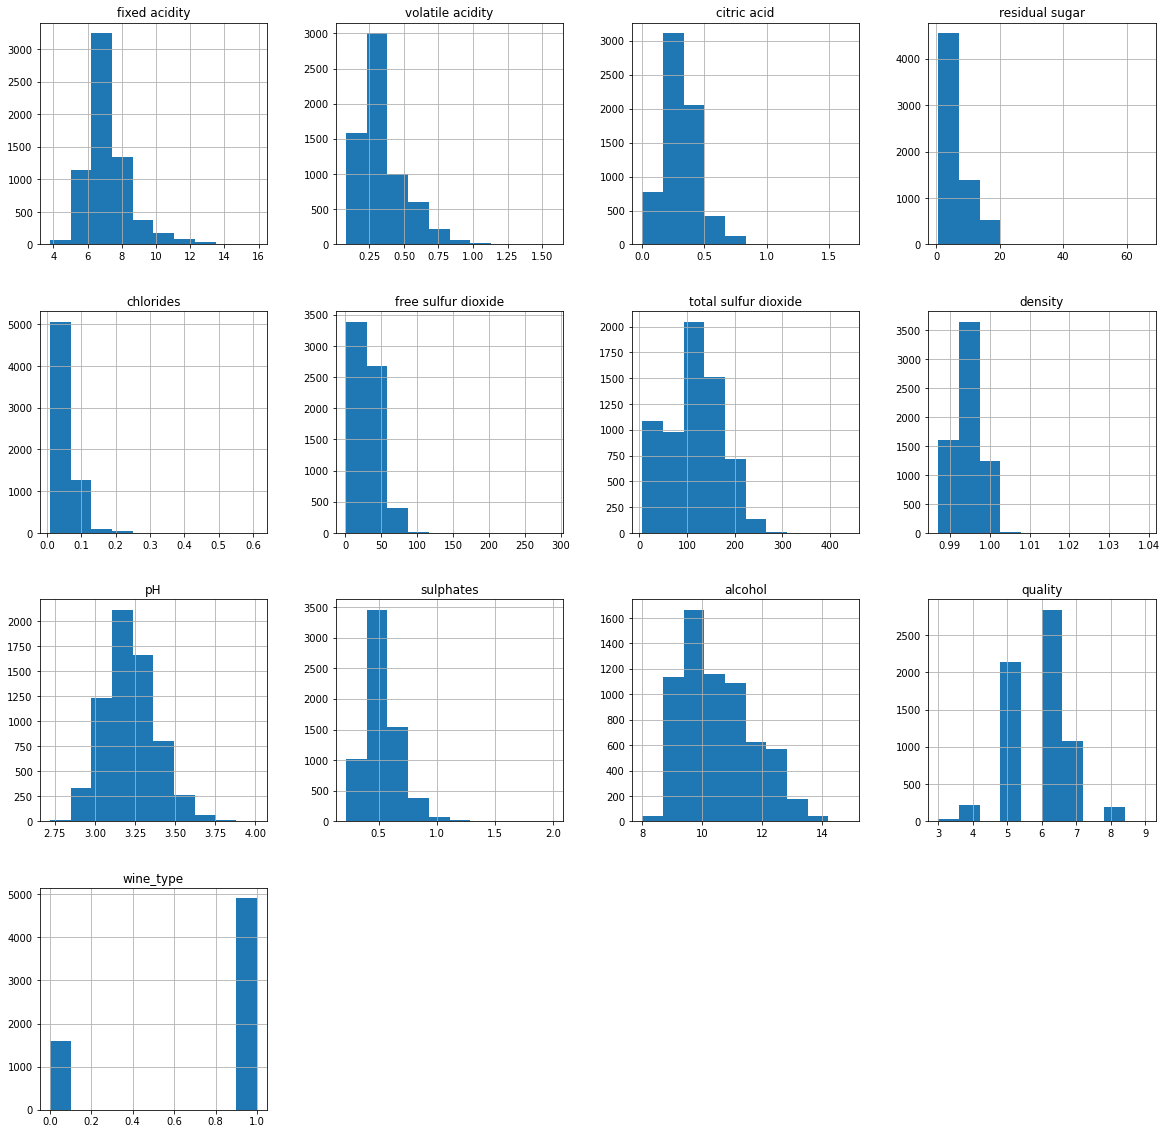

In [ ]:
%matplotlib inline

wine_data.hist(bins=10, figsize=(20,20))
plt.show()

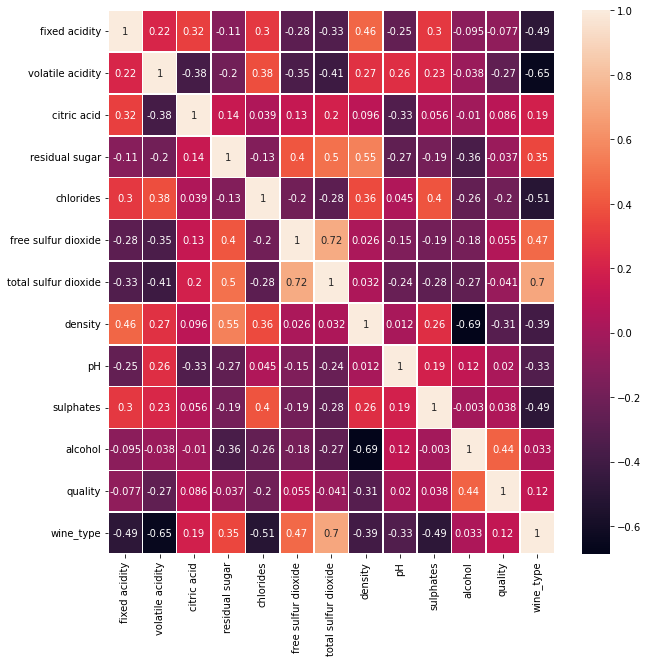

In [ ]:
corr_matrix = wine_data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,ax=ax)
plt.show()

In [ ]:
wine_data['wine_type'].value_counts()

1    4898
0    1599
Name: wine_type, dtype: int64

In [ ]:
# identify highly correlated features and choose what to drop from them
for a in range(len(wine_data.corr().columns)):
    for b in range(a):
        if abs(wine_data.corr().iloc[a,b]) >0.7:
            feature = wine_data.corr().columns[a]
            print(feature)

total sulfur dioxide
wine_type


# Data preprocessing

In [ ]:
# dropping features with correlation > 0.7
wine_data = wine_data.drop('total sulfur dioxide', axis=1)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [22]:
# data normalization
scaler = MinMaxScaler()
X = wine_data.drop(['wine_type'], axis=1)
X = scaler.fit_transform(X)
dataset_normalized = pd.DataFrame(X, columns=wine_data.drop(['wine_type'],axis=1).columns)
dataset_normalized['wine_type'] = wine_data['wine_type'] 

dataset_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.206092,0.612403,0.191011,0.202899,0.333333,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.186813,0.372093,0.258427,0.260870,0.333333,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.190669,0.418605,0.241573,0.260870,0.333333,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.209948,0.341085,0.202247,0.260870,0.500000,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.206092,0.612403,0.191011,0.202899,0.333333,0


# Train and test data preparation

In [110]:
from sklearn.model_selection import train_test_split
# our target feature is "wine_type" where 1 means white wine and 0 means red wine
dataset_classification = dataset_normalized.copy()
X = dataset_classification.drop('wine_type', axis=1)
y = dataset_classification['wine_type']
# use stratify to make sure that our target classes are balanced between train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y) 

In [34]:
X_train.shape

(5197, 11)

In [112]:
y_train.value_counts()

1    3918
0    1279
Name: wine_type, dtype: int64

In [111]:
X_test.shape

(1300, 11)

In [113]:
y_test.value_counts()

1    980
0    320
Name: wine_type, dtype: int64

# Implementation of machine learning model

In [61]:
# random forest model
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(X_train,y_train)
# predicting 
y_predict = rnd.predict(X_test)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       320
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


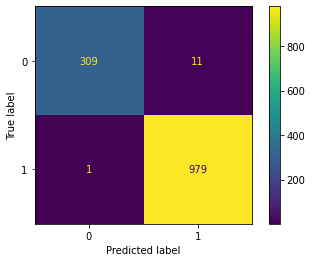

In [64]:
metrics.plot_confusion_matrix(rnd, X_test, y_test)
plt.show()

In [62]:
# Xgboost model
xgb = XGBClassifier()
# fit data
fit_xgb = xgb.fit(X_train,y_train)
# predicting 
y_predict = xgb.predict(X_test)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       320
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


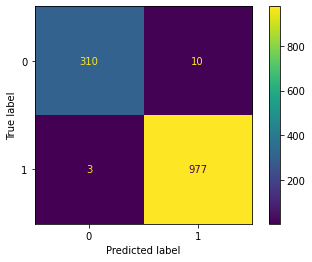

In [63]:
metrics.plot_confusion_matrix(xgb, X_test, y_test)
plt.show()

# Implementation of the neural network model

In [114]:
X_train = X_train.T
y_train = np.array(y_train).reshape((1,y_train.shape[0]))
X_test = X_test.T
y_test = np.array(y_test).reshape((1,y_test.shape[0]))

In [44]:
# our neural network parameters initialisation
def initialisation(n0, n1, n2, n3):

  W1 = np.random.randn(n1, n0)
  b1 = np.random.randn(n1, 1)
  W2 = np.random.randn(n2, n1)
  b2 = np.random.randn(n2, 1)
  W3 = np.random.randn(n3, n2)
  b3 = np.random.randn(n3, 1)
  
  parameters = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2,
      'W3': W3,
      'b3': b3
  }

  return parameters

In [38]:
# implementation of the forward propagation in our neural network
def forward_propagation(X,parameters):

  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']

  Z1 = W1.dot(X) + b1
  A1 = 1 / (1 + np.exp(-Z1))
  Z2 = W2.dot(A1) + b2
  A2 = 1 / (1 + np.exp(-Z2))
  Z3 = W3.dot(A2) + b3
  A3 = 1 / (1 + np.exp(-Z3))

  activations = {
      'A1': A1,
      'A2': A2,
      'A3': A3
  }

  return activations

In [39]:
# implementation of the backward propagation in our neural network
def back_propagation(X, y, activations, parameters):
  A1 = activations['A1']
  A2 = activations['A2']
  A3 = activations['A3']
  W2 = parameters['W2']
  W3 = parameters['W3']

  m = y.shape[1]

  dZ3 = A3 - y
  dW3 = 1 / m * dZ3.dot(A2.T)
  db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)

  dZ2 = np.dot(W3.T, dZ3) * A2 * (1-A2)
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

  dZ1 = np.dot(W2.T, dZ2) * A1 * (1-A1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

  gradients = {
      'dW1': dW1,
      'db1': db1,
      'dW2': dW2,
      'db2': db2,
      'dW3': dW3,
      'db3': db3
  }

  return gradients

In [40]:
# implementation of the parameters update in our neural network
def update(gradients, parameters, learning_rate):

  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']

  dW1 = gradients['dW1']
  db1 = gradients['db1']
  dW2 = gradients['dW2']
  db2 = gradients['db2']
  dW3 = gradients['dW3']
  db3 = gradients['db3']

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2
  W3 = W3 - learning_rate * dW3
  b3 = b3 - learning_rate * db3

  parameters = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2,
      'W3': W3,
      'b3': b3
  }

  return parameters

In [41]:
# implementation of the target prediction in our neural network
def predict(X, parameters):
  activations = forward_propagation(X, parameters)
  A3 = activations['A3']
  predictions = []
  for i in A3[0]:
    if (i >= 0.5):
      predictions.append(1)
    else:
      predictions.append(0)
  return predictions

In [115]:
# implementation of all steps in our neural network
def neural_network(X_train, y_train, n1, n2, learning_rate = 0.1, n_iter = 1000):

  # initialisation W, b
  n0 = X_train.shape[0]
  n3 = y_train.shape[0]
  parameters = initialisation(n0, n1, n2, n3)

  train_loss = []
  train_acc = []
  val_loss = []
  val_acc = []

  for i in range(n_iter):
    
    activations = forward_propagation(X_train, parameters)
    val_activations = forward_propagation(X_test, parameters)
    gradients = back_propagation(X_train, y_train, activations, parameters)
    parameters = update(gradients, parameters, learning_rate)
  
    # calculate train loss and accuracy
    train_loss.append(log_loss(y_train.flatten(), activations['A3'].flatten()))
    y_pred = predict(X_train, parameters)
    current_accuracy = accuracy_score(y_train.flatten(), y_pred)
    train_acc.append(current_accuracy)

    # calculate validation loss and accuracy
    val_loss.append(log_loss(y_test.flatten(), val_activations['A3'].flatten()))
    y_pred_val = predict(X_test, parameters)
    current_accuracy_val = accuracy_score(y_test.flatten(), y_pred_val)
    val_acc.append(current_accuracy_val)

    model_history = {
      'train_loss': train_loss,
      'val_loss': val_loss,
      'train_acc': train_acc,
      'val_acc': val_acc

      }
    if i >= 8 and (val_loss[i-8]-val_loss[i]) <= 0.001 :
      print('Early stopping at ' + str(i))
      break

  return parameters, model_history

# Training and evaluating the model

In [120]:
# training our model
parameters, model_history = neural_network(X_train, y_train, n1=64,n2= 32,  n_iter=1000, learning_rate=0.05)

In [121]:
# predicting our target validation values
y_pred_val = predict(X_test, parameters)
print(metrics.confusion_matrix(y_test.flatten(
),y_pred_val))

[[258  62]
 [ 12 968]]


In [122]:
# evaluating the model
print(classification_report(y_test.flatten(), y_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.81      0.87       320
           1       0.94      0.99      0.96       980

    accuracy                           0.94      1300
   macro avg       0.95      0.90      0.92      1300
weighted avg       0.94      0.94      0.94      1300



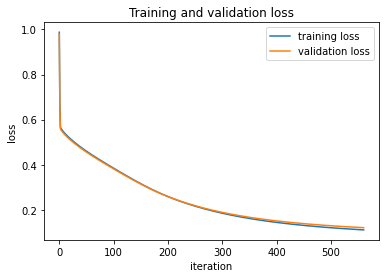

In [99]:
# the training loss indicates how well the model is fitting the training data
# while the validation loss indicates how well the model fits new data.
plt.plot(model_history['train_loss'], label='training loss')
plt.plot(model_history['val_loss'], label='validation loss')
plt.legend()
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()

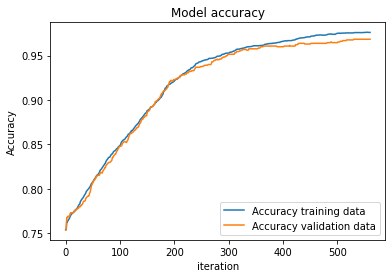

In [100]:
# plotting train and validation accuracy
plt.plot(model_history['train_acc'], label='Accuracy training data')
plt.plot(model_history['val_acc'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('iteration')
plt.show()